출처: \
https://medium.com/@pushkarmandot/https-medium-com-pushkarmandot-what-is-lightgbm-how-to-implement-it-how-to-fine-tune-the-parameters-60347819b7fc \
https://nurilee.com/2020/04/03/lightgbm-definition-parameter-tuning/comment-page-1/?unapproved=659&moderation-hash=8ab5f36d28f2b91d62db23ef4725b89d#comment-659

# Light GBM은 무엇일까요?

Light GBM은 Gradient Boosting 프레워크로 Tree 기반 학습 알고리즘입니다.

기존의 다른 Tree 기반 알고리즘과 어떻게 다를까요?

Light GBM은 Tree가 수직적으로 확장되는 반면에 다른 알고리즘은 Tree가 수평적으로 확장됩니다, 즉 Light GBM은 leaf-wise 인 반면 다른 알고리즘은 level-wise 입니다. 확장하기 위해서 max delta loss를 가진 leaf를 선택하게 되는 것이죠. 동일한 leaf를 확장할 때, leaf-wise 알고리즘은 level-wise 알고리즘보다 더 많은 loss, 손실을 줄일 수 있습니다.

아래 다이어그램은 LightGBM와 다른 Boosting 부스팅 알고리즘의 구현을 나타내고 있습니다.

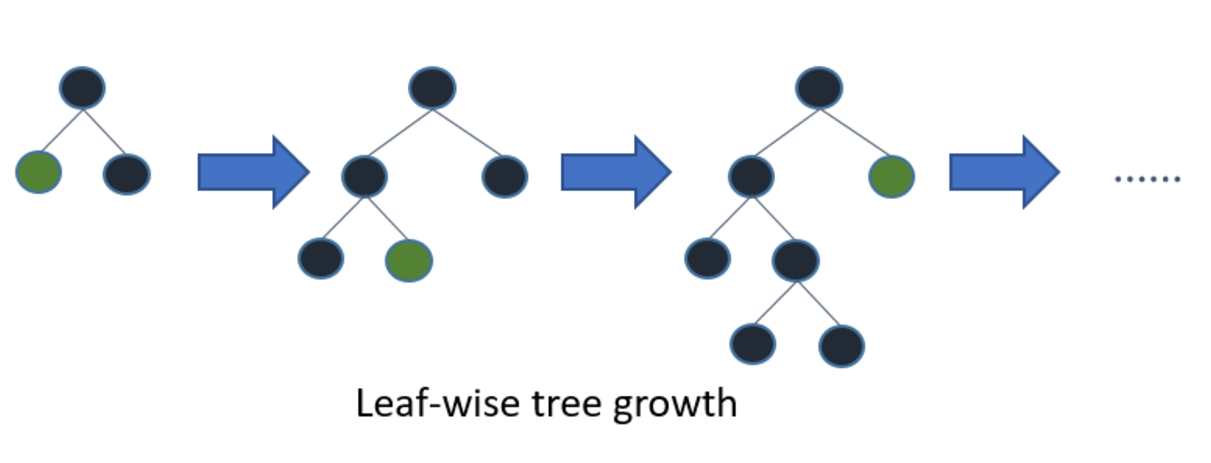

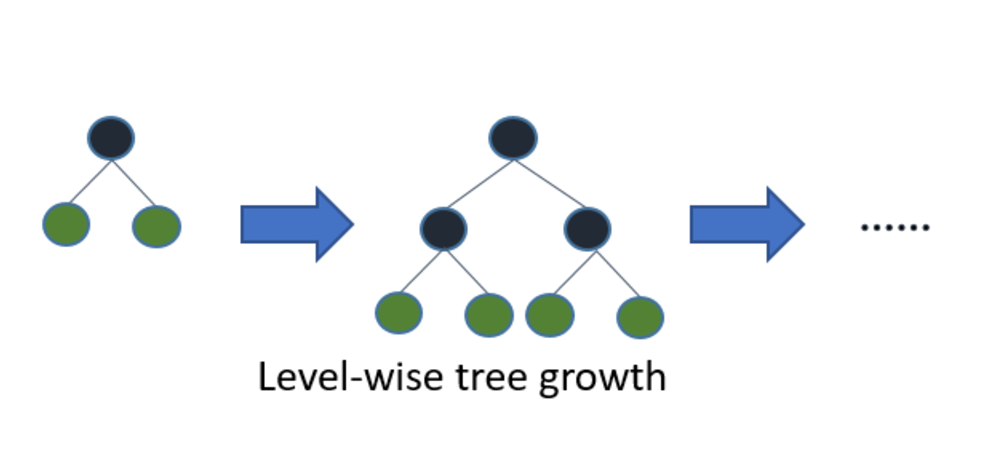

# Light GBM은 어떤 이유로 엄청난 인기를 얻게 되었을까요?

데이터 사이즈는 날이 갈수록 커지고 있고 전통적인 데이터 분석 알고리즘으로 빠른 결과를 얻기란 더욱 어려워졌습니다. Light GBM은 말 그대로 “Light” 가벼운 것인데요, 왜냐면 속도가 빠르기 때문입니다. Light GBM은 큰 사이즈의 데이터를 다룰 수 있고 실행시킬 때 적은 메모리를 차지합니다. Light GBM이 인기있는 또 다른 이유는 바로 결과의 정확도에 초점을 맞추기 때문입니다. LGBM은 또한 GPU 학습을 지원하기 때문에 데이터 사이언티스트가 데이터 분석 어플리케이션을 개발할 때 LGBM을 폭넓게 사용하고 있습니다.

# Light GBM은 어디서나 사용할 수 있을까요?

아닙니다. LGBM을 작은 데이터 세트에 사용하는 것은 추천되지 않습니다. Light GBM은 overfitting (과적합)에 민감하고 작은 데이터에 대해서 과적합하기 쉽습니다. row (행) 수에 대한 제한은 없지만 제 경험상 10,000 이상의 row (행) 을 가진 데이터에 사용하는 것을 권유해드립니다.

# 파라미터 소개

$max\_depth$ : Tree의 최대 깊이를 말합니다. 이 파라미터는 모델 과적합을 다룰 때 사용됩니다. 만약 여러분의 모델이 과적합된 것 같다고 느끼신다면 제 조언은 max_depth 값을 줄이라는 것입니다.

$min\_data\_in\_leaf$ : Leaf가 가지고 있는 최소한의 레코드 수입니다. 디폴트값은 20으로 최적 값입니다. 과적합을 해결할 때 사용되는 파라미터입니다.

$feature\_fraction$ : Boosting (나중에 다뤄질 것입니다) 이 랜덤 포레스트일 경우 사용합니다. 0.8 feature_fraction의 의미는 Light GBM이 Tree를 만들 때 매번 각각의 iteration 반복에서 파라미터 중에서 80%를 랜덤하게 선택하는 것을 의미합니다.

$bagging\_fraction$ : 매번 iteration을 돌 때 사용되는 데이터의 일부를 선택하는데 트레이닝 속도를 높이고 과적합을 방지할 때 주로 사용됩니다.

$early\_stopping_round$ : 이 파라미터는 분석 속도를 높이는데 도움이 됩니다. 모델은 만약 어떤 validation 데이터 중 하나의 지표가 지난 early_stopping_round 라운드에서 향상되지 않았다면 학습을 중단합니다. 이는 지나친 iteration을 줄이는데 도움이 됩니다.

$lambda$ : lambda 값은 regularization 정규화를 합니다. 일반적인 값의 범위는 0 에서 1 사이입니다.

$min\_gain\_to\_split$ : 이 파라미터는 분기하기 위해 필요한 최소한의 gain을 의미합니다. Tree에서 유용한 분기의 수를 컨트롤하는데 사용됩니다.

$max\_cat\_group$ : 카테고리 수가 클 때, 과적합을 방지하는 분기 포인트를 찾습니다. 그래서 Light GBM 알고리즘이 카테고리 그룹을 max_cat_group 그룹으로 합치고 그룹 경계선에서 분기 포인트를 찾습니다. 디폴트 값은 64 입니다.

# 핵심 파라미터 소개

$Task$ : 데이터에 대해서 수행하고자 하는 임무를 구체화합니다. train 트레이닝일 수도 있고 predict 예측일 수도 있습니다.

$application$ : 가장 중요한 파라미터로, 모델의 어플리케이션을 정하는데 이것이 regression 회귀분석 문제인지 또는 classification 분류 문제인지를 정합니다. Light GBM에서 디폴트는 regression 회귀분석 모델입니다.

- regression: 회귀분석
- binary: 이진 분류
- multiclass: 다중 분류

$boosting$ : 실행하고자 하는 알고리즘 타입을 정의합니다. 디폴트값은 gdbt 입니다.

- gdbt : Traditional Gradient Boosting Decision Tree
- rf : Random Forest
- dart : Dropouts meet Multiple Additive Regression Trees
- goss : Gradient-based One-Side Sampling

$num\_boost\_round$ : boosting iteration 수로 일반적으로 100 이상입니다.

$learning\_rate$ : 최종 결과에 대한 각각의 Tree에 영향을 미치는 변수입니다. GBM은 초기의 추정값에서 시작하여 각각의 Tree 결과를 사용하여 추정값을 업데이트 합니다. 학습 파라미터는 이러한 추정에서 발생하는 변화의 크기를 컨트롤합니다. 일반적인 값은 0.1, 0.001, 0.003 등등이 있습니다.

$num\_leaves$ : 전체 Tree의 leave 수 이고, 디폴트값은 31입니다.

$device$ : 디폴트 값은 cpu 인데 gpu로 변경할 수도 있습니다.

# 지표 파라미터

metric : 모델을 구현할 때 손실을 정하기 때문에 중요한 변수 중에 하나입니다. regression과 classification 을 위한 일반적인 손실 값이 아래에 나와있습니다.

- mae : mean absolute error
- mse : mean squared error
- binary_logloss : loss for binary classification
- multi_logloss : loss for multi classification

# IO 파라미터

$max\_bin$ : feature 값의 최대 bin 수를 의미합니다.

$categorical\_feature$ : 범주형 feature의 인덱스를 의미합니다. 만약 categorical_features 가 0, 1, 2 이면 column 0, column 1, column 2 가 범주형 변수들입니다.

$ignore\_column$ : categorical_features와 동일한 것인데 범주형 feature로써 특정 칼럼을 고려하지 않는 것입니다. 그 변수들을 무시하는 것입니다.

$save\_binary$ : 데이터 파일의 메모리 사이즈를 처리해야 한다면 이 파라미터 값을 True로 설정하십시오. 이 값을 True로 세팅하면 데이터 세트를 바이너리 파일로 저장할 것이고, 이 바이너리 파일은 다음에 데이터를 읽어올 때 그 속도를 줄여줄 것입니다.

위에 설명드린 파라미터들을 알고 사용하는 것은 모델을 구현할 때 도움이 될 것입니다. 

# 파라미터 튜닝 :

데이터 사이언티스트는 언제나 어떤 파라미터를 언제 사용할지 그리고 어떤 값이 최적의 파라미터 값일지 결정하기 위해 고민합니다.

아래 소개되는 기법들은 **모델 정확도**를 향상시키기 위해 사용될 수 있습니다.

1. $num\_leaves$ : Tree 모델의 복잡성을 컨트롤하는 주요 파라미터입니다. 이상적으로 num_leaves 값은 2 ^ (max_depth) 값보다 적거나 같아야 합니다. 이것보다 많은 값은 과적합을 유발할 것입니다.
2. $min\_data\_in\_leaf$ : 큰 값으로 세팅하는 것은 Tree가 너무 깊게 확장되는 것을 막을 수 있지만 under-fitting 언더 피팅이 발생할 수도 있습니다. 관행적으로, 수백 또는 수천 개로 정하는 것이 큰 데이터 세트에 충분합니다.
3. $max\_depth$ : Tree 깊이를 명확하게 제한하기 위해 max_depth 값을 설정할 수도 있습니다.

## 더 빠른 속도를 위하여 :

- bagging_fraction과 baggin_freq 을 설정하여 bagging 을 적용하십시오
- feature_fraction을 설정하여 feature sub-sampling을 하십시오
- 작은 max_bin 값을 사용하십시오
- save_binary 를 값을 통해 다가오는 학습에서 데이터 로딩 속도를 줄이십시오
- parallel learning 병렬 학습을 적용하십시오

## 더 나은 정확도를 위해 :

- 큰 max_bin 값을 사용하십시오 (아마 속도는 느려질 수 있습니다)
- 작은 learning_rate 값을 큰 num_iterations 값과 함께 사용하십시오
- 큰 num_leaves 값을 사용하십시오 (아마 과적합을 유발할 수도 있습니다)
- 더 큰 트레이닝 데이터를 사용하십시오
- dart 를 사용하십시오
- 범주형 feature를 사용하십시오

## 과적합을 해결하기 위해 :

- 작은 max_bin 값을 사용하십시오
- 작은 num_leaves 값을 사용하십시오
- min_data_in_leaf 와 min_sum_hessian_in_leaf 파라미터를 사용하십시오
- bagging_fraction 과 bagging_freq 을 사용하여 bagging 을 적용하십시오
- feature_fraction을 세팅하여 feature sub-sampling을 하십시오
- lambda_l1, lambda_l2 그리고 min_gain_to_split 파라미터를 이용해 regularization (정규화) 를 적용하십시오
- max_depth 를 설정해 Deep Tree 가 만들어지는 것을 방지하십시오